In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
K = 15
col_names = ["customer_id","gender","age","annual_income","spending_score"]
data = pd.read_csv("/content/Mall_Customers.csv",names=col_names,header=0)
data = data.sample(frac=1)
data.head()

,customer_id,gender,age,annual_income,spending_score
94,95,Female,32,60,42
101,102,Female,49,62,48
199,200,Male,30,137,83
44,45,Female,49,39,28
119,120,Female,50,67,57


In [ ]:
X = data.iloc[:, [3, 4]].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '#Customers')

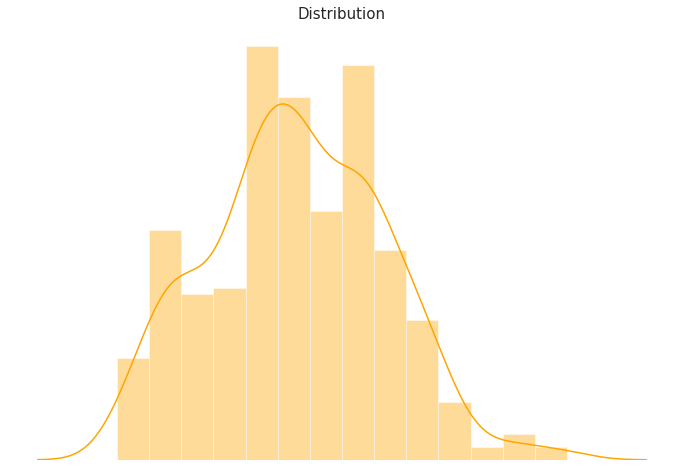

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style = 'darkgrid')
plt.title('Distribution',fontsize=15)
plt.axis('off')
sns.distplot(X,color='orange')
plt.xlabel('Distribution')
plt.ylabel('#Customers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


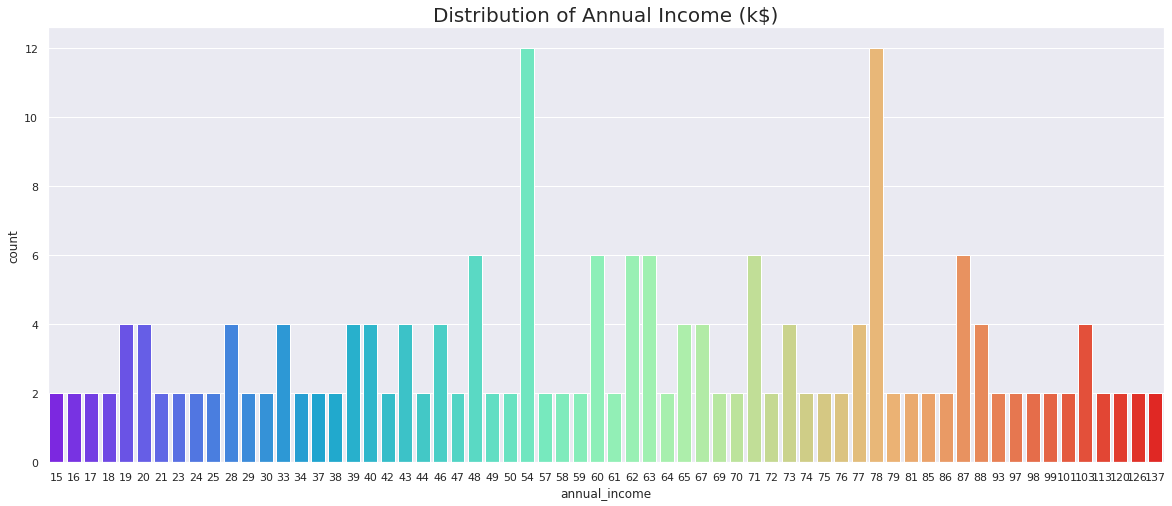

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data['annual_income'], palette = 'rainbow')
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.show()

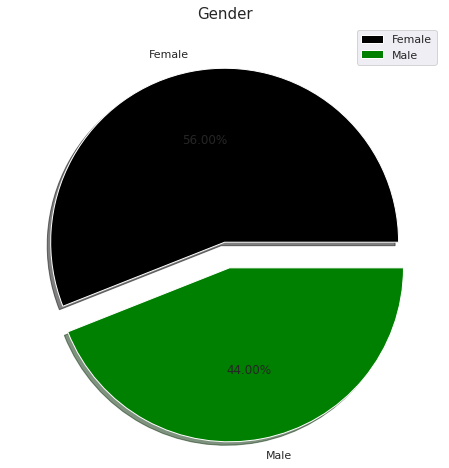

In [ ]:
plt.figure(figsize=(8,8))
size = data['gender'].value_counts()
colors = ['black', 'green']
plt.pie(size, colors = colors, explode = [0, 0.15], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

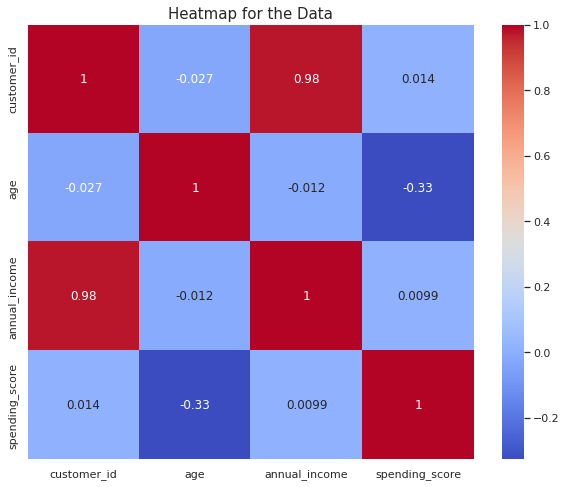

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

In [ ]:
data = data.iloc[:,[1,2,4]]
data = data.replace(to_replace="Female",value=1)
data = data.replace(to_replace="Male",value=0)

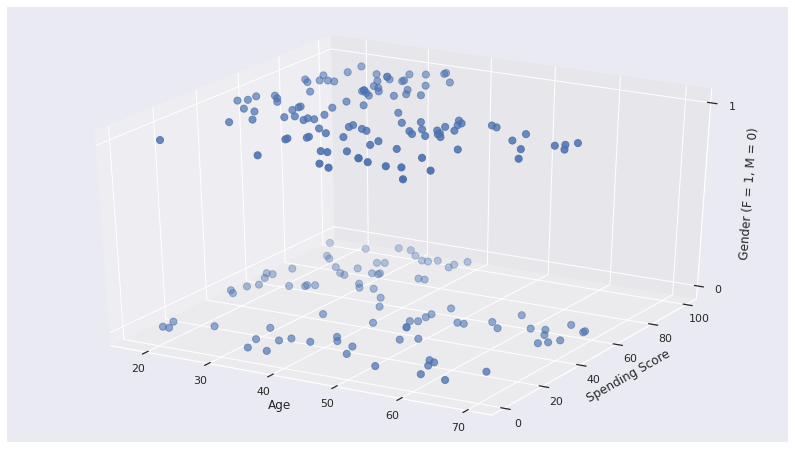

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")

x = data["age"].values
z = data["gender"].values
y = data["spending_score"].values

img = ax.scatter(x, y, z, s=50)
ax.set_zticks([0, 1])
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Gender (F = 1, M = 0)')
plt.show()

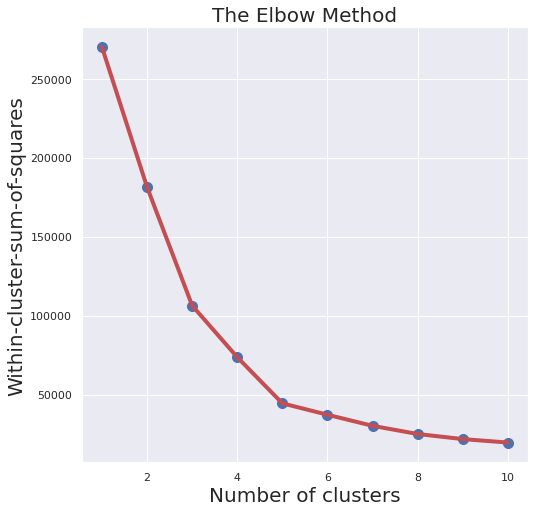

In [ ]:
# Use of the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,8))
plt.scatter(range(1, 11),wcss,c='b',s=100)
plt.plot(range(1, 11),wcss,c='r',linewidth=4)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Within-cluster-sum-of-squares',fontsize=20)
plt.show()

K-means: num of clusters - 4


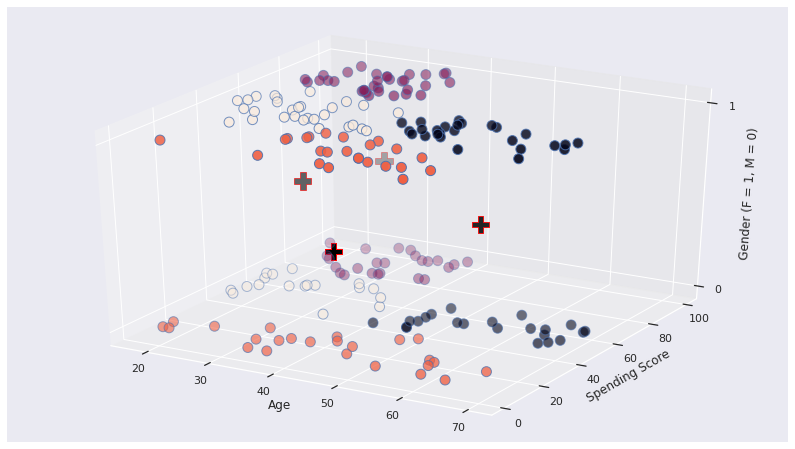

In [ ]:
vals = data.values
k = 4 #from graph above

kmeans = KMeans(n_clusters = k, init = 'k-means++').fit(vals)

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")

x = data["age"].values
z = data["gender"].values
y = data["spending_score"].values

print(f"K-means: num of clusters - {k}")

ax.scatter3D(x, y, z, s=100, c=kmeans.labels_, edgecolors='b')
ax.scatter3D(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:, 0], s = 300, color = 'black', marker="P", edgecolors='red')

# fig.colorbar(img1)
ax.set_zticks([0, 1])
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Gender (F = 1, M = 0)')
plt.show()

Affinity Propagation: num of clusters - 10


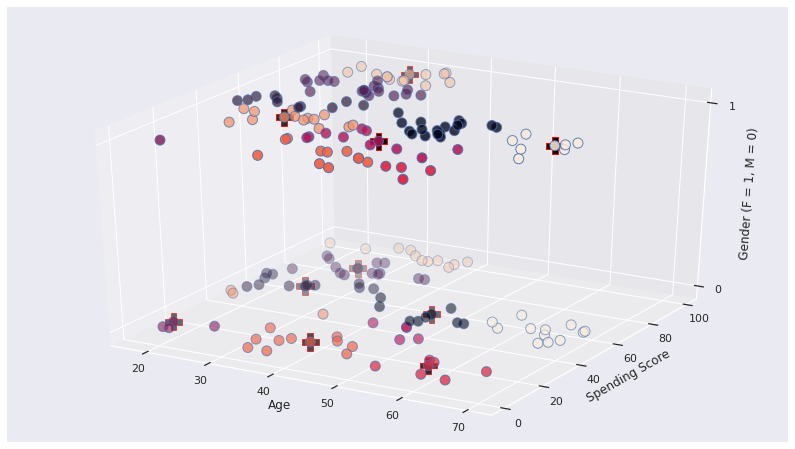

In [ ]:
afprop = AffinityPropagation().fit(vals)
cluster_centers = afprop.cluster_centers_indices_
num_clusters = len(cluster_centers)
print(f"Affinity Propagation: num of clusters - {num_clusters}")

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")

x = data["age"].values
z = data["gender"].values
y = data["spending_score"].values

ax.scatter3D(x, y, z, s=100, c=afprop.labels_, edgecolors='b')
ax.scatter3D(afprop.cluster_centers_[:, 1], afprop.cluster_centers_[:, 2],afprop.cluster_centers_[:, 0], s = 300, color = 'black', marker="P", edgecolors='red')

# fig.colorbar(img1)
ax.set_zticks([0, 1])
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Gender (F = 1, M = 0)')
plt.show()

Mean-shift: num of clusters - 4


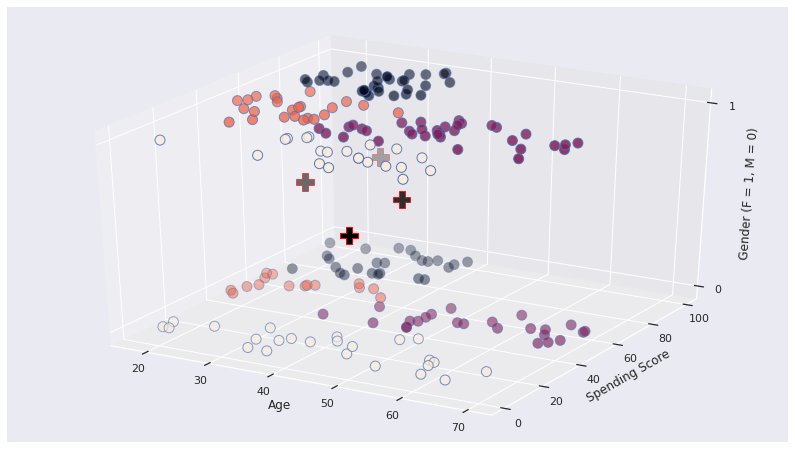

In [ ]:
bandwidth = estimate_bandwidth(vals, quantile=0.2, n_samples=20)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(vals)
cluster_centers = ms.cluster_centers_
num_clusters = len(cluster_centers)

print(f"Mean-shift: num of clusters - {num_clusters}")

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")

x = data["age"].values
z = data["gender"].values
y = data["spending_score"].values

ax.scatter3D(x, y, z, s=100, c=ms.labels_, edgecolors='b')
ax.scatter3D(ms.cluster_centers_[:, 1], ms.cluster_centers_[:, 2],ms.cluster_centers_[:, 0], s = 300, color = 'black', marker="P", edgecolors='red')

# fig.colorbar(img1)
ax.set_zticks([0, 1])
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Gender (F = 1, M = 0)')
plt.show()

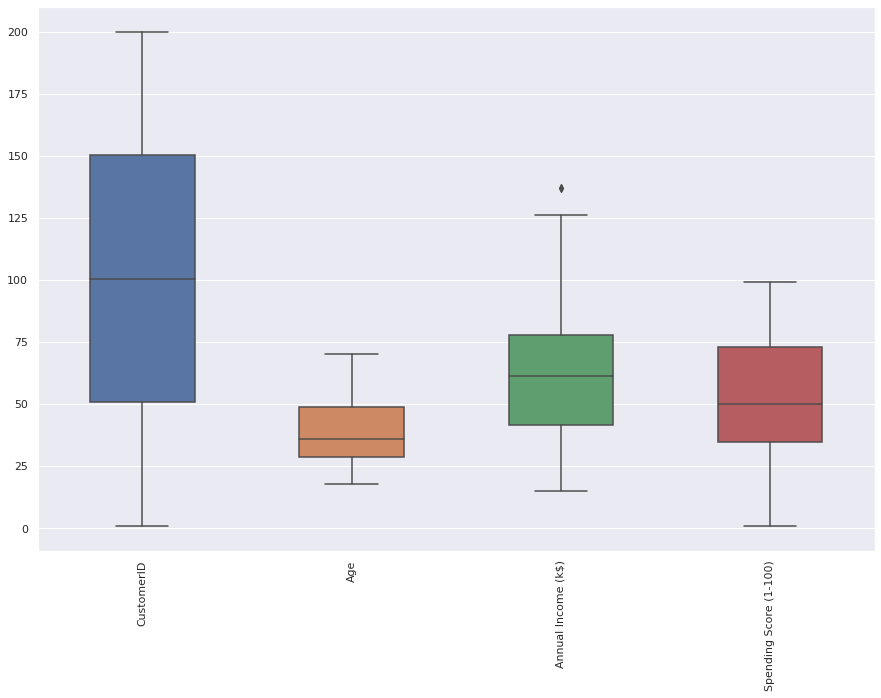

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
lb=label_binarize(df['Gender'],classes=["Female","Male"])
df.drop(['Gender'],axis=1,inplace=True)
lb=pd.DataFrame(lb,columns=['Gender'])

In [ ]:
df=df.join(lb)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
df_scaled=scaled.fit_transform(df)


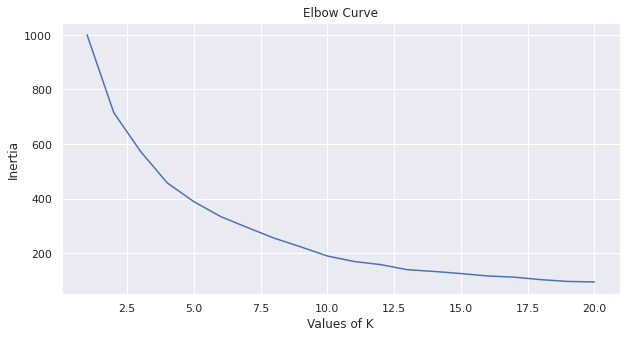

In [ ]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    km =KMeans(n_clusters=num_clusters)
    km.fit(df_scaled)
    inertia_list.append(km.inertia_)

#Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [ ]:
km =KMeans(n_clusters=3)
km.fit(df_scaled)

KMeans(n_clusters=3)

In [ ]:
pred=km.predict(df_scaled)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
126,127,Male,43,71,35
155,156,Female,27,78,89
51,52,Male,33,42,60
73,74,Female,60,50,56
176,177,Male,58,88,15
166,167,Male,42,86,20
185,186,Male,30,99,97
90,91,Female,68,59,55
86,87,Female,55,57,58
104,105,Male,49,62,56


In [ ]:
dataset.index

RangeIndex(start=0, stop=200, step=1)

In [ ]:
dataset_select = dataset.replace({ 'Gender': {'Male':0 , 'Female':1}} )

In [ ]:
corr = dataset_select.corr()
corr.shape

(5, 5)

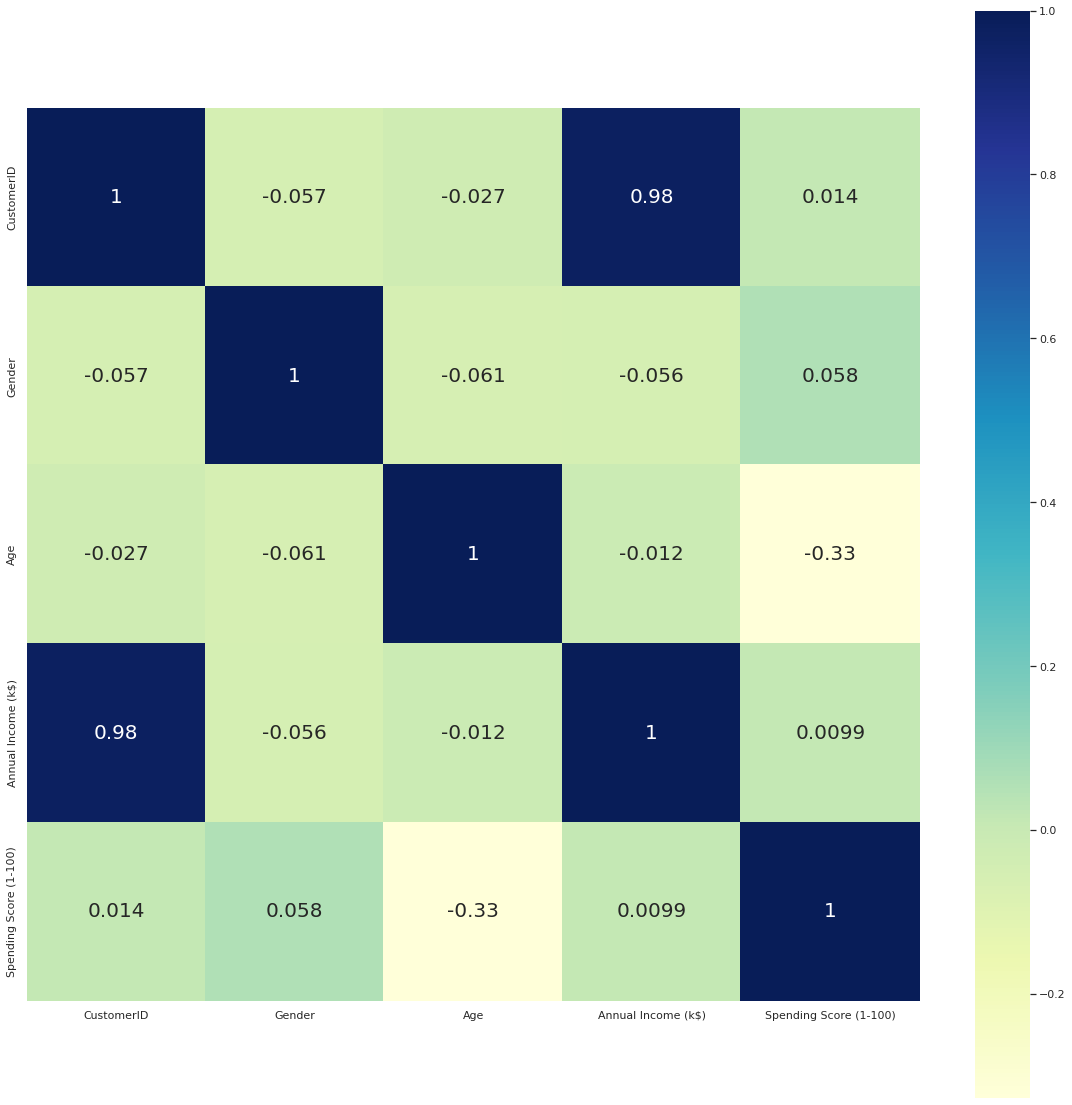

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, annot=True, annot_kws={'size':20}, cmap='YlGnBu')

In [ ]:
X = dataset.iloc[:, [2, 4]].values

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 2)
y_kmeans = kmeans.fit_predict(X)

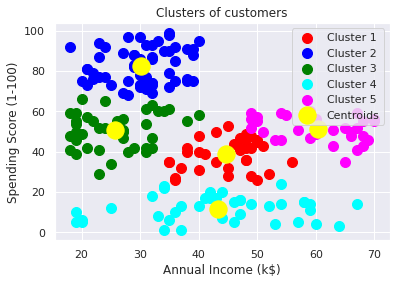

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

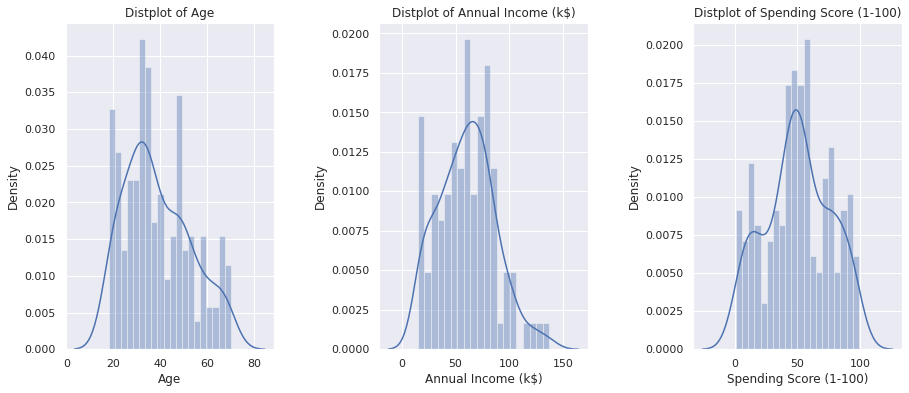

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

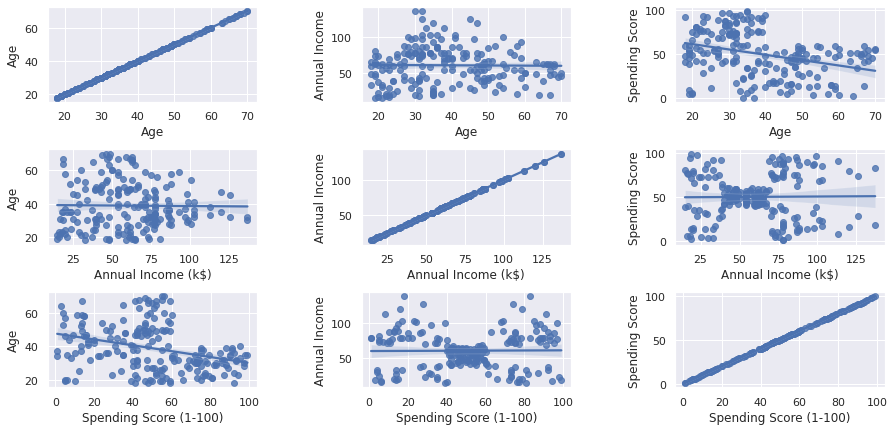

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()